# Sentiment Analysis

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline


# Datetime
from datetime import datetime

# text preprocessing

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import re


In [34]:
## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("datacleaned6.csv")

In [5]:
data

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,categories,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time,clean_text
0,A30TL5EWN6DFXT,120401325X,christina,4,1400630400,['Cell Phones & Accessories'],Looks Good They look good and stick good! I ju...,0,0,good,0.000000,2014-05-21,look good look good stick good like rounded sh...
1,ASY55RVNIL0UD,120401325X,emily l.,5,1389657600,['Cell Phones & Accessories'],Really great product. These stickers work like...,0,0,good,0.000000,2014-01-14,great product sticker work like review say sti...
2,A2TMXE2AFO7ONB,120401325X,Erica,5,1403740800,['Cell Phones & Accessories'],LOVE LOVE LOVE These are awesome and make my p...,0,0,good,0.000000,2014-06-26,love love love awesome phone look stylish far ...
3,AWJ0WZQYMYFQ4,120401325X,JM,4,1382313600,['Cell Phones & Accessories'],Cute! Item arrived in great time and was in pe...,4,0,good,1.000000,2013-10-21,cute item arrive great time perfect condition ...
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,5,1359849600,['Cell Phones & Accessories'],leopard home button sticker for iphone 4s awes...,2,1,good,0.666667,2013-02-03,leopard home button sticker iphone awesome sta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190991,A1YMNTFLNDYQ1F,B00LORXVUE,eyeused2loveher,5,1405900800,['Cell Phones & Accessories'],This works just perfect! Works great just like...,0,0,good,0.000000,2014-07-21,work perfect work great like original need ext...
190992,A15TX8B2L8B20S,B00LORXVUE,Jon Davidson,5,1405900800,['Cell Phones & Accessories'],Great replacement cable. Apple certified Great...,0,0,good,0.000000,2014-07-21,great replacement cable apple certify great pr...
190993,A3JI7QRZO1QG8X,B00LORXVUE,Joyce M. Davidson,5,1405900800,['Cell Phones & Accessories'],"Real quality This is a great cable, just as go...",0,0,good,0.000000,2014-07-21,real quality great cable good expensive apple ...
190994,A1NHB2VC68YQNM,B00LORXVUE,Nurse Farrugia,5,1405814400,['Cell Phones & Accessories'],I really like it becasue it works well with my...,0,0,good,0.000000,2014-07-20,like becasue work life proof like becasue work...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190996 entries, 0 to 190995
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   reviewer_id       190996 non-null  object 
 1   product_id        190996 non-null  object 
 2   reviewer_name     190990 non-null  object 
 3   rating            190996 non-null  int64  
 4   unix_review_time  190996 non-null  int64  
 5   categories        190996 non-null  object 
 6   review_text       190996 non-null  object 
 7   pos_feedback      190996 non-null  int64  
 8   neg_feedback      190996 non-null  int64  
 9   rating_class      190996 non-null  object 
 10  help_prop         190996 non-null  float64
 11  review_time       190996 non-null  object 
 12  clean_text        190987 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 18.9+ MB


## Data Preprocessing

In [7]:
data['rating_class'] = data['rating_class'].apply(lambda x: 0 if x == 'bad' else 1)

In [8]:
data.head()

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,categories,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time,clean_text
0,A30TL5EWN6DFXT,120401325X,christina,4,1400630400,['Cell Phones & Accessories'],Looks Good They look good and stick good! I ju...,0,0,1,0.000000,2014-05-21,look good look good stick good like rounded sh...
1,ASY55RVNIL0UD,120401325X,emily l.,5,1389657600,['Cell Phones & Accessories'],Really great product. These stickers work like...,0,0,1,0.000000,2014-01-14,great product sticker work like review say sti...
2,A2TMXE2AFO7ONB,120401325X,Erica,5,1403740800,['Cell Phones & Accessories'],LOVE LOVE LOVE These are awesome and make my p...,0,0,1,0.000000,2014-06-26,love love love awesome phone look stylish far ...
3,AWJ0WZQYMYFQ4,120401325X,JM,4,1382313600,['Cell Phones & Accessories'],Cute! Item arrived in great time and was in pe...,4,0,1,1.000000,2013-10-21,cute item arrive great time perfect condition ...
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,5,1359849600,['Cell Phones & Accessories'],leopard home button sticker for iphone 4s awes...,2,1,1,0.666667,2013-02-03,leopard home button sticker iphone awesome sta...


In [9]:
data['rating_class'].value_counts(normalize=True)*100

1    87.439004
0    12.560996
Name: rating_class, dtype: float64

Checking and dropping null values in clean_text Column

In [10]:
data['clean_text'].isnull().sum()

9

In [11]:
data.shape

(190996, 13)

In [12]:
data.dropna(subset='clean_text',inplace=True)
data.shape

(190987, 13)

### Train test split

In [13]:
# Splitting the Data Set into Train and Test Sets
X = data['clean_text']
y = data['rating_class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=2)

In [15]:
y_train=y_train.astype(np.uint8)
y_test=y_test.astype(np.uint8)

In [16]:
y_train

131879    1
26660     1
56369     1
44973     1
45703     1
         ..
162100    1
175647    1
95820     1
100883    1
89260     1
Name: rating_class, Length: 133690, dtype: uint8

In [17]:
print ('Train data Shape\t\t:{}\nTest data Shape \t\t:{}'.format(X_train.shape, X_test.shape))

Train data Shape		:(133690,)
Test data Shape 		:(57297,)


### Evaluation metrics

As the data is imbalanced (87 : 13), accuracy alone would'nt be enough to define the performance of the model.F1 score (which is harmonic average of precision and recall) is taken as the evaluation metrics for my Sentiment Analysis.

### NLP techniques to represent the clean text

As Machine Learning models can only take numerical values as inputs, we have to give a numerical representation to the text of our data. It is important to give a compact representation to our text in a correct dimensional space where the text is correctly classified

Some techniques in NLP to convert text to vector like Sentence Embedding is used to give a compact and Semantic representation thereby helping the model to classify correctly

### Sentence Embedding

In [15]:
! pip install -U sentence-transformers

  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125940 sha256=986f069d237a17689cb24176775ce6f975505af8eec6c922107d91810e2e19f9
  Stored in directory: c:\users\gnvsa\appdata\local\pip\cache\wheels\71\67\06\162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [19]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [20]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [21]:
X_train['embeddings'] = X_train['clean_text'].apply(lambda x: model.encode(x))
X_test['embeddings'] = X_test['clean_text'].apply(lambda x: model.encode(x))

In [22]:
# Use the pandas `str.split` method to separate the array values into separate columns
X_train = pd.concat([X_train, pd.DataFrame(X_train['embeddings'].to_list(), index=X_train.index)], axis=1)

# Drop the original 'array_column'
X_train = X_train.drop(['embeddings'], axis=1)

In [23]:
# Use the pandas `str.split` method to separate the array values into separate columns
X_test = pd.concat([X_test, pd.DataFrame(X_test['embeddings'].to_list(), index=X_test.index)], axis=1)

# Drop the original 'array_column'
X_test = X_test.drop(['embeddings'], axis=1)

In [24]:
# Drop 'meaningful text' column

# X_train= X_train.drop(['clean_text'], axis=1)
X_test = X_test.drop(['clean_text'], axis=1)

In [25]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
3528,-0.159614,0.116161,0.069042,-0.014651,0.003140,-0.047495,0.097601,0.048377,0.014282,-0.004135,...,-0.007231,-0.058752,-0.002965,0.020389,0.018845,0.005113,0.056510,0.020902,0.041241,0.084116
21542,-0.087398,0.054729,0.102610,-0.013652,0.006583,0.011646,0.084416,0.103772,-0.033217,0.057866,...,0.028984,0.036058,0.028325,-0.005652,0.101200,-0.026216,0.057093,-0.074772,0.027284,0.117036
71428,-0.104247,-0.017596,0.004198,-0.055726,-0.095925,0.010594,0.146003,0.079807,0.021776,-0.008730,...,0.045759,-0.040351,-0.046714,-0.028440,0.121487,0.027894,-0.055193,-0.098084,-0.071939,0.074855
67793,-0.077692,0.101896,0.102889,-0.033780,0.060781,-0.026393,0.107244,0.052802,-0.013133,0.051671,...,0.041528,0.004793,0.014360,0.007189,0.112523,0.014694,-0.002799,0.012602,-0.007755,0.090212
95050,-0.093794,0.030979,0.109169,-0.039556,-0.021032,-0.052936,0.079843,0.047859,-0.009852,0.013571,...,0.044773,0.000009,-0.002167,-0.004893,0.133097,0.047997,-0.030085,-0.032612,-0.001002,0.085552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74028,-0.084601,0.047796,0.111715,-0.024871,-0.020069,-0.039364,0.114433,0.062623,0.048905,-0.010601,...,-0.026947,-0.146447,0.022850,0.031581,-0.036297,0.035612,0.001743,-0.103542,0.049099,-0.009962
3337,-0.134043,0.104315,0.018334,0.021007,-0.010897,-0.005895,-0.015744,0.063376,0.030030,0.007566,...,-0.065584,-0.060336,-0.020927,0.084333,-0.033665,-0.020087,0.139139,0.007792,-0.012269,0.097694
165699,-0.041820,0.061196,0.073779,-0.036899,0.027214,0.026035,0.029513,0.053779,-0.018622,-0.006607,...,-0.115097,-0.013763,-0.068766,0.063374,-0.048421,-0.008477,0.067055,0.021293,-0.021154,0.034204
168859,-0.133181,0.076152,-0.015233,0.021780,-0.112462,0.097161,-0.013787,0.060230,-0.009053,0.031548,...,-0.000226,-0.072571,-0.008383,0.007739,-0.017720,-0.058524,-0.043248,-0.000760,-0.089518,0.021103


In [26]:
X_test.to_csv('testing_data_embeddings.csv')

In [28]:
X_train=pd.read_csv("training_data_embeddings.csv")
X_train

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,131879,-0.030274,-0.013979,0.102248,-0.087156,-0.031972,-0.011442,-0.056192,-0.039121,-0.037695,...,-0.001600,-0.046384,-0.022066,0.004107,-0.026848,0.020370,0.112115,0.009378,0.118372,0.027588
1,26660,-0.151332,0.127926,0.085120,0.024182,0.036010,0.014135,0.018253,0.000015,-0.007055,...,0.011987,-0.068178,0.007379,0.058439,-0.016716,0.002000,0.072331,0.078265,0.027154,0.065005
2,56369,-0.095299,0.098412,0.062102,-0.039756,0.027728,-0.031828,0.029916,0.093538,-0.020991,...,-0.011276,-0.023922,0.004823,0.056308,0.026181,0.013880,0.015944,-0.021660,-0.022493,0.076310
3,44973,-0.110942,0.012049,0.028500,-0.021932,-0.117626,0.024289,0.087203,-0.024862,-0.016911,...,0.016606,0.047860,0.002984,0.065492,0.032009,0.023470,0.013785,0.018246,-0.025991,0.020713
4,45703,-0.082614,0.046173,0.070089,-0.026533,-0.046809,0.040553,0.103348,0.024800,-0.072431,...,0.034196,0.011678,0.047850,0.055204,-0.033871,-0.020666,-0.110851,-0.044978,0.035341,0.080326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133685,162100,-0.068404,0.062260,0.043940,-0.025779,0.001873,-0.012120,-0.035987,-0.041165,-0.020412,...,-0.027337,-0.019415,0.010478,0.011340,-0.039985,-0.004049,0.108712,0.065978,0.043799,0.079958
133686,175647,-0.118415,0.049538,0.055921,-0.002538,0.027804,0.012255,-0.005946,0.021390,-0.038594,...,-0.034389,0.024198,0.020955,0.018477,-0.035421,0.014694,0.029283,-0.035885,0.030114,0.092128
133687,95820,-0.067362,0.148402,0.019977,0.006194,-0.046224,0.030075,0.076686,0.006060,0.006563,...,0.027267,0.006355,0.009965,0.017343,-0.018444,0.017218,0.049095,0.033527,-0.022212,0.058033
133688,100883,-0.067259,0.009232,0.040217,-0.035552,-0.006058,-0.007296,0.094082,0.062992,0.008213,...,0.002736,-0.033519,0.057703,0.067724,0.016140,-0.009708,-0.010915,0.000748,0.059159,0.048308


In [29]:
X_train.drop('Unnamed: 0',axis=1,inplace=True)

     1. Logistic Regression  

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_val_pred = logreg.predict(X_test)

score = f1_score(y_test, y_val_pred, average = 'weighted')
score

0.8897452878278732

    2. Decision Tree

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": [0, 200]}
dtclf3 = DecisionTreeClassifier()
dtclf_grid = GridSearchCV(dtclf3, param_grid, cv=3)
dtclf_grid.fit(X_train,y_train)
y_val_pred = dtclf_grid.predict(X_test)
score = f1_score(y_test, y_val_pred, average = 'weighted')
score

0.8218927850695935

    3. Random Forest

In [30]:
param_grid = {"n_estimators" : [20, 100],
              "max_depth" : [1,50],
              "max_features" : [30, 50]}
clf3 = RandomForestClassifier()
clf_grid = GridSearchCV(clf3, param_grid, cv=2)
clf_grid.fit(X_train,y_train)
y_val_pred = clf_grid.predict(X_test)
score = f1_score(y_test, y_val_pred, average = 'weighted')
score

0.8460581778722911

    4. Gaussian Naive Bayes

In [32]:
naive=GaussianNB()
naive.fit(X_train,y_train)
y_val_pred = naive.predict(X_test)
score = f1_score(y_test, y_val_pred, average = 'weighted')
score

0.8053369909229872

     5. XG Boost

In [33]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_val_pred = xgb.predict(X_test)
score = f1_score(y_test, y_val_pred, average = 'weighted')
score

0.8826017932341885

    6. AdaBoost

In [35]:
clf_adaboost =  AdaBoostClassifier()
clf_adaboost.fit(X_train, y_train)
#print(clf_adaboost.best_params_)
y_val_pred = clf_adaboost.predict(X_test)
score = f1_score(y_test, y_val_pred, average = 'weighted')
score

0.8628009871988357

    7. GradientBoost

In [36]:
clf_gradient =  GradientBoostingClassifier()
clf_gradient.fit(X_train, y_train)
#print(clf_adaboost.best_params_)
y_val_pred = clf_gradient.predict(X_test)
score = f1_score(y_test, y_val_pred, average = 'weighted')
score

0.8613825703362123

#### Visual Representation of the performance of the models in terms of Average F1 Score : 

In [62]:
x = list(['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'XG Boost', 'AdaBoost', 'GradientBoost'])
y = list([0.8897452878278732,0.8218927850695935,0.8460581778722911,0.8053369909229872,0.8826017932341885,0.8628009871988357,0.8613825703362123])
performance=pd.DataFrame({'Model':x,'Avg F1 Score':y})
performance['Avg F1 Score']=performance['Avg F1 Score'].apply(lambda x: round(x,3))

In [63]:
performance

,Model,Avg F1 Score
0,Logistic Regression,0.890
1,Decision Tree,0.822
2,Random Forest,0.846
3,Gaussian Naive Bayes,0.805
4,XG Boost,0.883
5,AdaBoost,0.863
6,GradientBoost,0.861


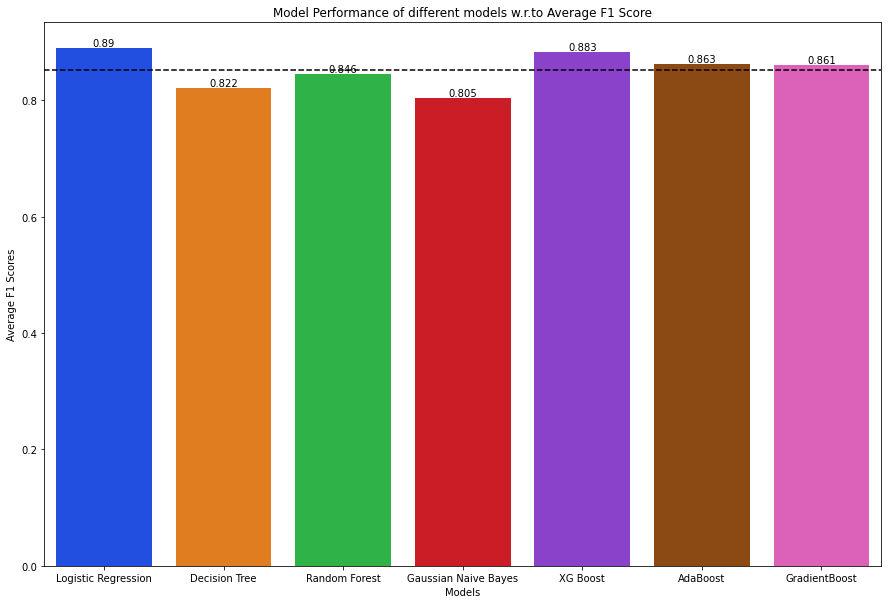

In [64]:
plt.figure(figsize=(15,10))
# Plot the bar chart using Seaborn
ax = sns.barplot(x='Model',y='Avg F1 Score', data=performance, palette='bright')

# Add values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha='center', va='bottom')
    if height == average_value:
        ax.annotate(f'Avg: {average_value:.2f}', (p.get_x() + p.get_width() / 2., height/2), ha='center', va='center', color='black')
    
average_value=performance['Avg F1 Score'].mean()    
plt.axhline(y=average_value, color='black', linestyle='--', label='Average')
# ax.text(len(performance) - 0.5, average_value + 1, f'Average: {average_value:.2f}', ha='right', va='bottom', color='black')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Average F1 Scores')
plt.title('Model Performance of different models w.r.to Average F1 Score')

# Show the plot
plt.show()